N: Normal beat
S: Supraventricular premature beat
V: Premature ventricular contraction
F: Fusion of ventricular and normal beat
Q: Unclassifiable beat
M: myocardial infarction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Arrhythmia_Classification_Project')

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
train_path = '/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_data/train'
valid_path = '/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_data/test'

In [ ]:
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# creates an instance of the VGG19 model with specific input shape, pre-trained weights from ImageNet, and excludes the fully connected classification layers

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
from glob import glob

folders = glob('/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/train/*')

In [ ]:
folders

['/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/train/F',
 '/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/train/S',
 '/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/train/V',
 '/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/train/Q',
 '/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/train/N',
 '/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/train/M']

In [ ]:
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 19025 images belonging to 6 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Arrhythmia_Classification_Project/ECG_Image_Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4791 images belonging to 6 classes.


In [ ]:
len(training_set)

595

In [ ]:
len(test_set)

150

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=32,
  validation_steps= 10
)

<ipython-input-21-28ef0e444b37>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/4
32/32 [==============================] - 1024s 32s/step - loss: 1.2503 - accuracy: 0.6592 - val_loss: 0.6891 - val_accuracy: 0.7312
Epoch 2/4
32/32 [==============================] - 1023s 32s/step - loss: 0.2276 - accuracy: 0.9434 - val_loss: 0.1337 - val_accuracy: 0.9750
Epoch 3/4
32/32 [==============================] - 994s 31s/step - loss: 0.1356 - accuracy: 0.9658 - val_loss: 0.1104 - val_accuracy: 0.9688
Epoch 4/4
32/32 [==============================] - 1014s 32s/step - loss: 0.0962 - accuracy: 0.9814 - val_loss: 0.1198 - val_accuracy: 0.9719


In [ ]:
model.save('model_vgg19')

In [ ]:
print(r.history['accuracy'])

[0.6591796875, 0.943359375, 0.9658203125, 0.9814453125]


In [ ]:
print(r.history['val_accuracy'])

[0.731249988079071, 0.9750000238418579, 0.96875, 0.971875011920929]


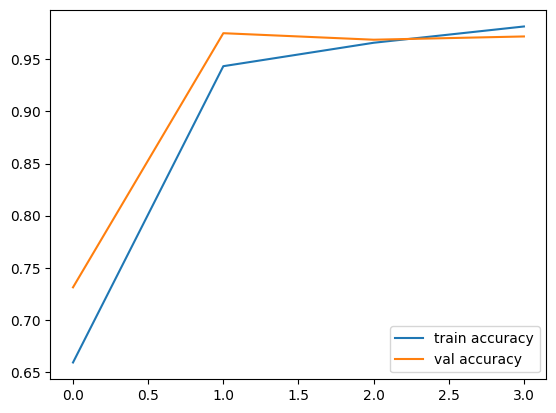

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
# plt.savefig('AccVal_accuracy')

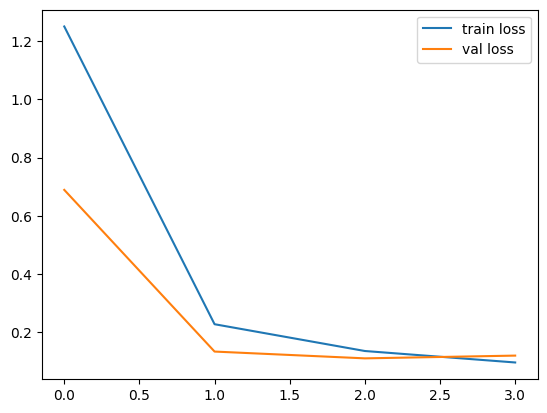

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

In [ ]:
y_true = test_set.classes

In [ ]:
r2 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=64,
  validation_steps= 10
)

<ipython-input-21-efbd8d9cf177>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r2 = model.fit_generator(


Epoch 1/4
64/64 [==============================] - 2122s 33s/step - loss: 0.7205 - accuracy: 0.7856 - val_loss: 0.1760 - val_accuracy: 0.9688
Epoch 2/4
64/64 [==============================] - 2083s 33s/step - loss: 0.1144 - accuracy: 0.9775 - val_loss: 0.0849 - val_accuracy: 0.9812
Epoch 3/4
64/64 [==============================] - 2091s 33s/step - loss: 0.0759 - accuracy: 0.9863 - val_loss: 0.0488 - val_accuracy: 0.9937
Epoch 4/4
64/64 [==============================] - 2064s 32s/step - loss: 0.0523 - accuracy: 0.9917 - val_loss: 0.0562 - val_accuracy: 0.9844


In [ ]:
model.save('model_vgg19_2')

In [ ]:
print(r2.history['accuracy'])

[0.78564453125, 0.9775390625, 0.986328125, 0.99169921875]


In [ ]:
print(r2.history['val_accuracy'])

[0.96875, 0.981249988079071, 0.9937499761581421, 0.984375]


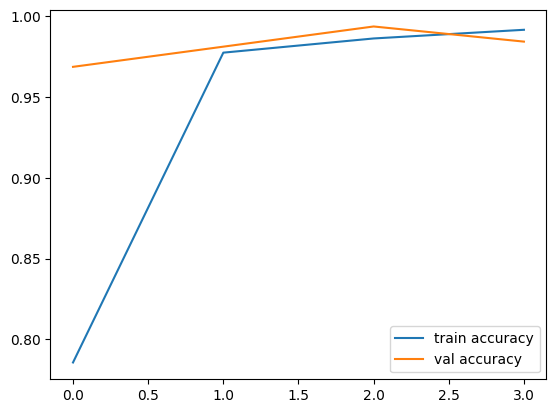

In [ ]:
plt.plot(r2.history['accuracy'], label='train accuracy')
plt.plot(r2.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
# plt.savefig('AccVal_accuracy')

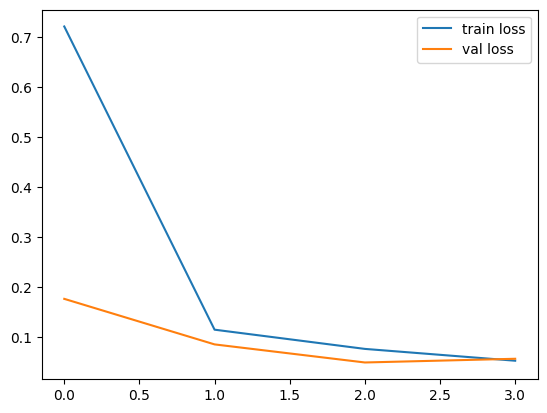

In [ ]:
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
np.unique(y_true)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Arrhythmia_Classification_Project/model_vgg19')

In [ ]:
model2 = tf.keras.models.load_model('/content/drive/MyDrive/Arrhythmia_Classification_Project/model_vgg19_2')

In [ ]:
y_pred = model.predict(test_set)

86/86 [==============================] - 2114s 25s/step


In [ ]:
y_pred = model2.predict(test_set)

150/150 [==============================] - 3981s 27s/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.07      0.08       161
           1       0.20      0.20      0.20       501
           2       0.17      0.16      0.16       501
           3       0.19      0.20      0.20       521
           4       0.23      0.22      0.22       558
           5       0.20      0.20      0.20       509

    accuracy                           0.19      2751
   macro avg       0.18      0.18      0.18      2751
weighted avg       0.19      0.19      0.19      2751


Confusion Matrix:
[[ 12  24  30  32  35  28]
 [ 33 101 104  89  90  84]
 [ 31  93  82  95 106  94]
 [ 27 101 100 103  94  96]
 [ 26  92  89 114 124 113]
 [ 29  89  91 101  96 103]]


In [ ]:
cf = confusion_matrix(y_true, y_pred_classes)

In [ ]:
import seaborn as sns

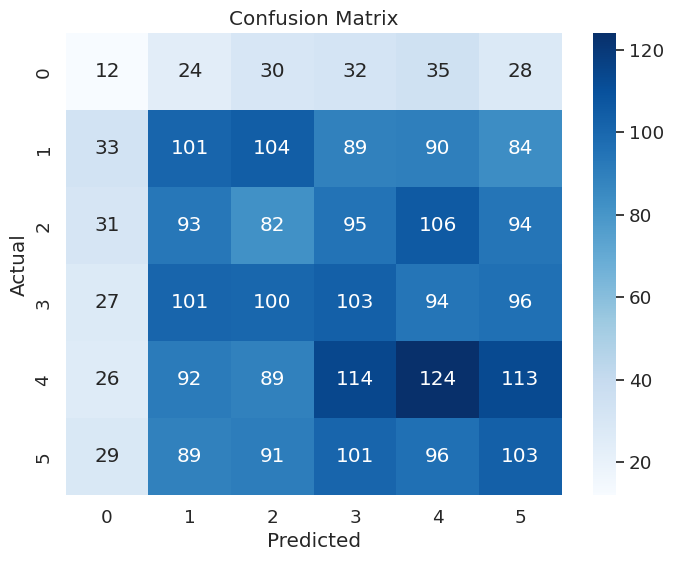

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       161
           1       0.21      0.21      0.21      1002
           2       0.19      0.18      0.19      1002
           3       0.20      0.20      0.20      1030
           4       0.12      0.12      0.12       558
           5       0.23      0.23      0.23      1038

    accuracy                           0.19      4791
   macro avg       0.16      0.16      0.16      4791
weighted avg       0.19      0.19      0.19      4791


Confusion Matrix:
[[  2  32  39  39  23  26]
 [ 34 210 209 234 110 205]
 [ 37 209 185 215 113 243]
 [ 35 224 213 210 130 218]
 [ 21 110 116 113  65 133]
 [ 26 217 215 223 114 243]]
